In [ ]:
# 1. importamos librerias
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# 2. Importar csv a DataFrames
dataAppleStore = pd.read_csv('../AppleStore.csv')
dataPlayStore = pd.read_csv('../googleplaystore.csv')

In [ ]:
# 3. Eliminar elementos duplicados
#PlayStore:-----------------------
dataPlayStore = dataPlayStore.sort_values('App')
dataPlayStore.drop_duplicates('App', keep="last", inplace=True)
dataPlayStore.sort_index(inplace=True) 

#ApleStore:------------------------
dataAppleStore = dataAppleStore.sort_values('track_name')
dataAppleStore.drop_duplicates('track_name', keep="last", inplace=True)
dataAppleStore.sort_index(inplace=True) 

In [12]:
# 4. Llenar nuevo Data Frame con elementos iguales

print('inicia proceso >>>')
dataComparacion = pd.DataFrame()
indexApp = 0
contador = 0
index = 0
for idxAppleStore, rowAppleStore in dataAppleStore.iterrows():
    indexApp = dataPlayStore.loc[dataPlayStore['App'] == rowAppleStore.loc['track_name']]
    if len(indexApp) > 0:
        dataComparacion.loc[index, 'app_categoria'] = rowAppleStore.loc['prime_genre']
        dataComparacion.loc[index, 'app_nombre'] = rowAppleStore.loc['track_name']
        dataComparacion.loc[index, 'app_apple_peso'] = rowAppleStore.loc['size_bytes']        
        dataComparacion.loc[index, 'app_play_peso'] = dataPlayStore.loc[indexApp.index[0], 'Size']    
        dataComparacion.loc[index, 'app_rating_apple'] = rowAppleStore.loc['cont_rating']
        dataComparacion.loc[index, 'app_rating_play'] = dataPlayStore.loc[indexApp.index[0], 'Rating']            
        dataComparacion.loc[index, 'app_precio_apple'] = float(rowAppleStore.loc['price'])
        dataComparacion.loc[index, 'app_precio_play'] = float(dataPlayStore.loc[indexApp.index[0], 'Price'].replace('$', ''))           
        dataComparacion.loc[index, 'app_version_apple'] = rowAppleStore.loc['ver']
        dataComparacion.loc[index, 'app_version_play'] = dataPlayStore.loc[indexApp.index[0], 'Current Ver']
        index += 1
        
print('...')
dataComparacion.to_csv('../dataComparacion.csv')
print('<<< fin...')


inicia proceso >>>
...
<<< fin...


In [13]:
# 5. Filtrar precios mayores a cero tanto en App Store y Google Play
dataComparacionPrecios = dataComparacion.loc[(dataComparacion.app_precio_play > 0) & (dataComparacion.app_precio_apple > 0)]
print(dataComparacion['app_nombre'].count())


328


In [14]:
# 6. Agrupar por Categoria y Precio
print('incio >>>')
dataComparacionCategorias = dataComparacionPrecios.groupby(['app_categoria'], sort=True)['app_precio_apple', 'app_precio_play'].max()
print(dataComparacionCategorias)
print('<<< fin')

incio >>>
                   app_precio_apple  app_precio_play
app_categoria                                       
Book                           2.99             2.99
Catalogs                       7.99             7.99
Education                      2.99             3.99
Entertainment                  3.99             4.99
Food & Drink                   4.99             4.99
Games                         14.99             9.99
Health & Fitness               6.99             6.99
Medical                       19.99            24.99
Social Networking              2.99             2.99
Utilities                      3.99             3.99
<<< fin


In [16]:
# Ejemplo de barras 1:

label = list(dataComparacionCategorias.app_nombre)
aplicaciones = list(dataComparacionCategorias.loc[:, 'app_precio_apple'])


index = np.arange(len(label))
plt.figure(figsize=(20,10))
plt.bar(index, aplicaciones)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('No of Movies', fontsize=12)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Diferencia de Precios Entre Aplicaciones')
plt.style
plt.show()




AttributeError: 'DataFrame' object has no attribute 'app_nombre'

In [17]:
# Ejemplo de barras 2:

label = list(dataComparacionCategorias.app_nombre)
aplicaciones = list(dataComparacionCategorias.loc[:, 'app_precio_apple'])


index = np.arange(len(label))
plt.figure(figsize=(20,10))
plt.bar(index, aplicaciones)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('No of Movies', fontsize=12)
plt.xticks(index, label, fontsize=13, rotation=90)
plt.title('Diferencia de Precios Entre Aplicaciones')
plt.style
plt.show()



AttributeError: 'DataFrame' object has no attribute 'app_nombre'

NameError: name 'label' is not defined

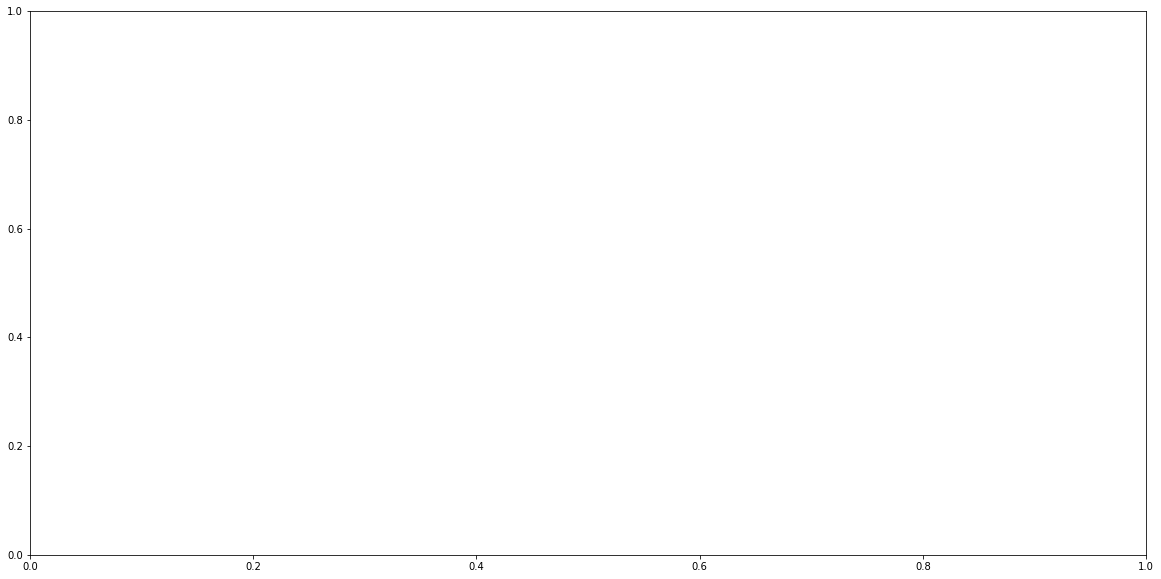

In [18]:
# Ejemplo de barras 3:

fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionCategorias.loc[:, 'app_precio_apple']),
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionCategorias.loc[:, 'app_precio_play']),
            width=bar_width)

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(dataComparacionCategorias.app_nombre.unique())
plt.xticks(rotation = 90)

NameError: name 'label' is not defined

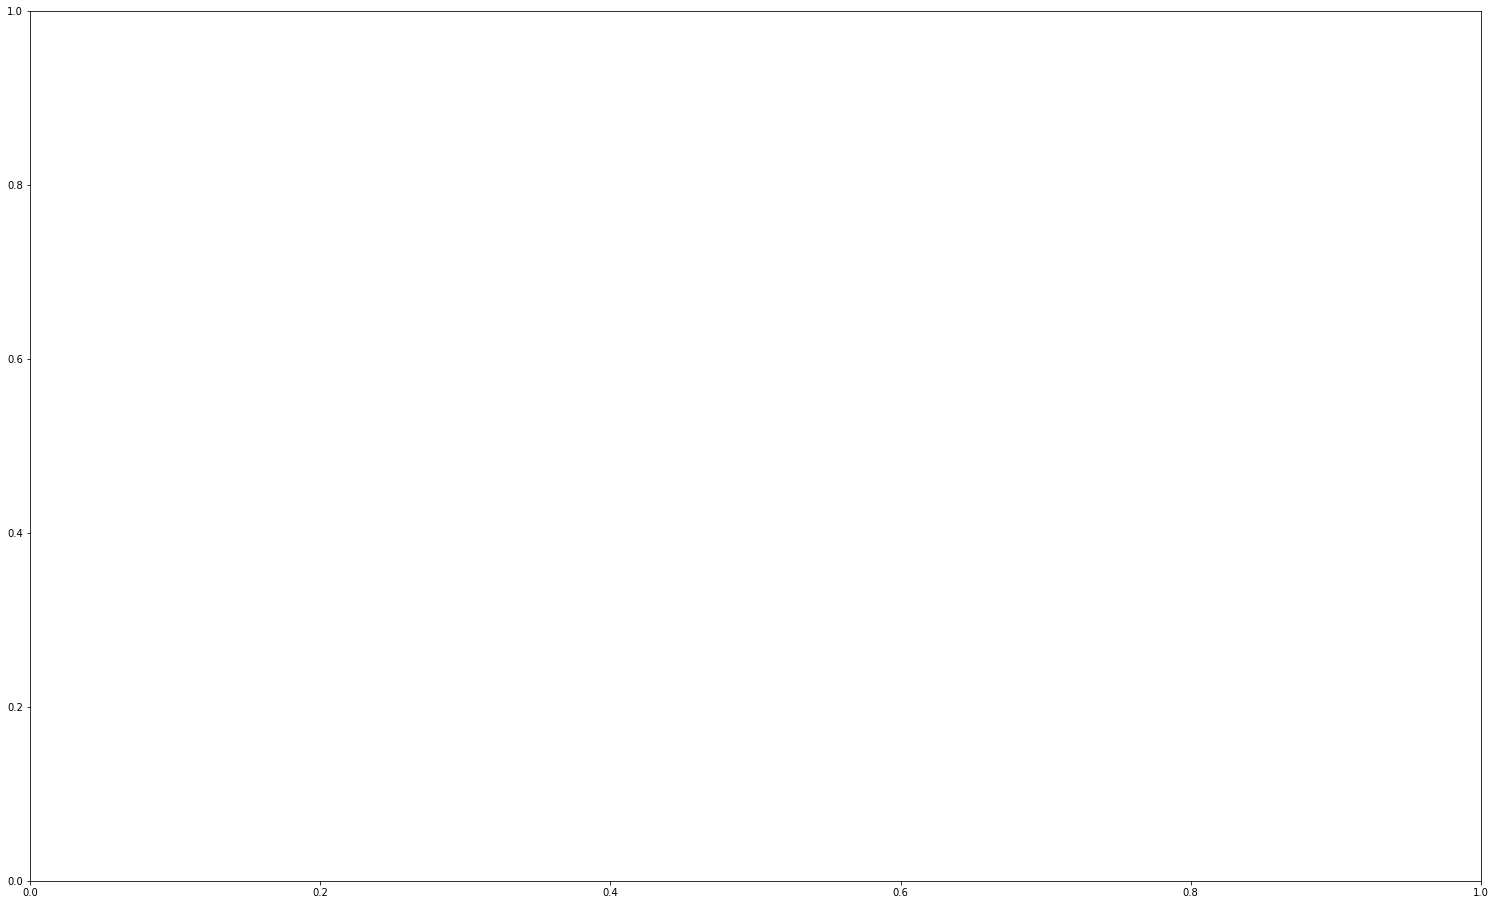

In [19]:
# Ejemplo de barras 4:

fig, ax = plt.subplots(figsize=(26, 16))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionCategorias.loc[:, 'app_precio_apple']),
            width=bar_width, label='Apple Store')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionCategorias.loc[:, 'app_precio_play']),
            width=bar_width, label='Play Store')

# Fix the x-axes.
ax.set_xticks(x)
ax.set_xticklabels(dataComparacionCategorias.app_nombre.unique())
ax.legend()
plt.xticks(rotation = 90)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)


autolabel(b1)
autolabel(b2)

fig.tight_layout()

plt.show()

In [20]:

# Ejemplo de barras 5:
dataComparacionRatingYPreciosDiferentes = dataComparacionCategorias.loc[(dataComparacionCategorias.app_precio_apple != dataComparacionCategorias.app_precio_play)]
label = list(dataComparacionRatingYPreciosDiferentes.app_nombre)

fig, ax = plt.subplots(figsize=(26, 16))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionRatingYPreciosDiferentes.loc[:, 'app_precio_apple']),
            width=bar_width, label='Apple Store')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionRatingYPreciosDiferentes.loc[:, 'app_precio_play']),
            width=bar_width, label='Play Store')

# Fix the x-axes.
ax.set_xticks(x)
ax.set_xticklabels(dataComparacionRatingYPreciosDiferentes.app_nombre.unique())
ax.legend()
plt.xticks(rotation = 90)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)


autolabel(b1)
autolabel(b2)

fig.tight_layout()

plt.show()



AttributeError: 'DataFrame' object has no attribute 'app_nombre'

In [ ]:
dataComparacionRatingYPreciosDiferentes = dataComparacionCategorias.loc[dataComparacionCategorias.app_precio_apple != dataComparacionCategorias.app_precio_play]
dataComparacionRatingYPreciosDiferentes

